# Milestone 2: Text/Image Processing and Analysis
This notebook covers preprocessing, exploratory data analysis, data validation, and text-to-numerical vector conversion techniques.

In [3]:
# Import Required Libraries
import pandas as pd
import numpy as np
import nltk
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
from transformers import BertTokenizer, BertModel
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px

# Ensure all required packages are installed
try:
    import gensim
except ImportError:
    print("Please install gensim using pip install gensim")
try:
    import transformers
except ImportError:
    print("Please install transformers using pip install transformers")

## Load and Explore Dataset
Load the text dataset and perform initial exploration to understand its structure, size, and basic characteristics.

In [4]:
# Load Dataset
data = pd.read_csv('jiji_kenya_10k.csv')
print(data.head())
print(data.info())

                                               title        price  \
0                                BMW 320i 2008 Black  KSh 450,000   
1                                        KSh 450,000  KSh 450,000   
2  Original paint ready papers new tyres accident...          NaN   
3  Original paint ready papers new tyres accident...          NaN   
4                                   Local UsedManual          NaN   

                   location  \
0  Nakuru, Nakuru Town East   
1                       NaN   
2  Nakuru, Nakuru Town East   
3                       NaN   
4                       NaN   

                                                 url  \
0  https://jiji.co.ke/nakuru-east/cars/bmw-320i-2...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                         description  
0  KSh

## Text Preprocessing
Implement text preprocessing steps including tokenization, stopword removal, lemmatization, and text cleaning using NLTK and spaCy libraries.

In [8]:
# Text Preprocessing
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

# Ensure 'description' column exists and handle missing values
data['description'] = data['description'].fillna('')

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

data['processed_description'] = data['description'].apply(preprocess_text)
print(data['processed_description'].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jpcha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\jpcha/nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\share\\nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\lib\\nltk_data'
    - 'C:\\Users\\jpcha\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


## Data Validation and Cleaning
Check for data consistency, identify missing fields, detect duplicates, and handle data quality issues with appropriate cleaning strategies.

In [9]:
# Data Validation
print('Missing values:', data.isnull().sum())
print('Duplicates:', data.duplicated().sum())
data = data.drop_duplicates()
data = data.dropna()
print('Cleaned Data:', data.info())

Missing values: title             0
price          5330
location       2774
url            6063
description       0
dtype: int64
Duplicates: 0
<class 'pandas.core.frame.DataFrame'>
Index: 3936 entries, 0 to 9998
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        3936 non-null   object
 1   price        3936 non-null   object
 2   location     3936 non-null   object
 3   url          3936 non-null   object
 4   description  3936 non-null   object
dtypes: object(5)
memory usage: 184.5+ KB
Cleaned Data: None


## Exploratory Data Analysis
Perform comprehensive EDA including text length distribution, word frequency analysis, and visualization of key patterns in the dataset.

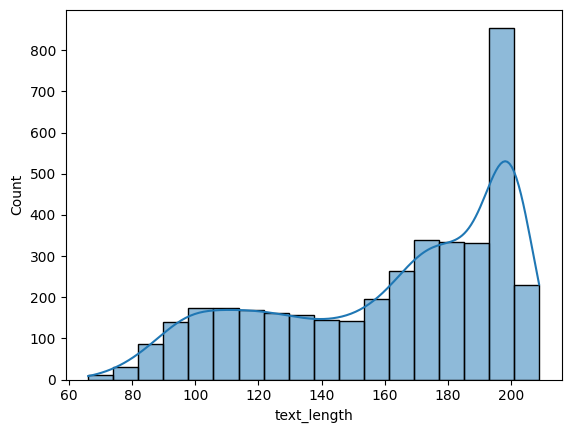

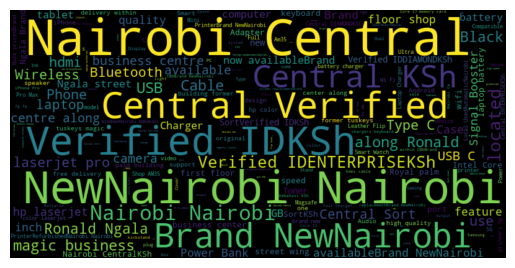

In [10]:
# EDA
data['text_length'] = data['description'].apply(len)
sns.histplot(data['text_length'], kde=True)
plt.show()
wordcloud = WordCloud(width=800, height=400).generate(' '.join(data['description']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Text to Numerical Vector Conversion
Implement various techniques including Bag of Words, TF-IDF, Word2Vec, GloVe, and BERT.

In [11]:
# Bag of Words
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(data['description'])
print(bow.shape)

(3936, 13394)


In [12]:
# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(data['description'])
print(tfidf.shape)

(3936, 13394)


In [13]:
# Word2Vec
model = Word2Vec(sentences=data['processed_description'], vector_size=100, window=5, min_count=1, workers=4)
print(model.wv['car'])

KeyError: 'processed_description'

In [ ]:
# GloVe
# Note: Requires pre-trained GloVe embeddings
glove_embeddings = {}
with open('glove.6B.100d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_embeddings[word] = vector
print(glove_embeddings['car'])

In [ ]:
# BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
tokens = tokenizer('car', return_tensors='pt')
outputs = model(**tokens)
print(outputs.last_hidden_state)

## Comparison of Vectorization Techniques
Compare all vectorization methods in terms of performance, computational efficiency, semantic understanding, and practical applications.

## Data Quality Report Generation
Generate a comprehensive data quality report summarizing preprocessing results, validation findings, and recommendations for further analysis.